# Exercise 1
We will analyze the effect of the non-informative prior distribution on Bayesian inference. You aim to compare two models, one with a uniform prior, second with the beta distribution. Please, generate 200 draws of a biased coin with a probability of getting a tail equal to 0.7 and compare inference results as a function of flips number. Plot and interpret the results.

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from cmdstanpy import set_cmdstan_path, cmdstan_path
set_cmdstan_path('/home/jaqb/Documents/cmdstan-2.26.1')
cmdstan_path()

'/home/jaqb/Documents/cmdstan-2.26.1'

#### Simulate tossing a coin 200 times, with probability of tail 0.7:

In [23]:
N = 200
coin_toss = [np.random.choice([0, 1], p=[0.3, 0.7]) for _ in range(N)]

#### Count tails (represented by ones):

In [13]:
T = sum(coin_toss)
T

145

##### Stan code for model1:
<code>data {
   int&lt;lower=0&gt; T;
   int&lt;lower=0&gt; N;
}
parameters {
   real&lt;lower=0, upper=1&gt; p; 
}
model {
    p ~ uniform(0, 1); // prior for p
    T ~ binomial(N, p);
}</code>

In [3]:
model1 = CmdStanModel(stan_file='model1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model1


In [4]:
samples1 = model1.sample(data={
    'T': 145,
    'N': 200
}, output_dir='samples')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2


#### In this case uniform prior is sufficient for the model to infer proper posterior distribution:

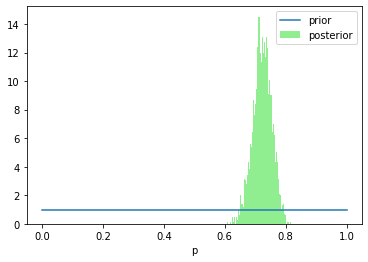

In [102]:
x = np.linspace(0, 1, 100)
posterior = samples1.stan_variable('p')
plt.plot(x, stats.uniform.pdf(x))
plt.hist(posterior, bins=100, density=True, color='lightgreen')
plt.xlabel('p')
plt.legend(['prior', 'posterior'])
plt.show()

In [8]:
mean_p = np.mean(posterior)
ci = az.hdi(posterior, 0.89)
print(f"Posterior mean: {mean_p}")
print(f"89% confidennce interval: [{ci[0]}, {ci[1]}]")

Posterior mean: 0.7234885795
89% confidennce interval: [0.677463, 0.776522]


#### Stan code for model2:
<code>data {
   int&lt;lower=0&gt; T;
   int&lt;lower=0&gt; N;
   real&lt;lower=0&gt; alfa;
   real&lt;lower=0&gt; beta;
}
parameters {
   real&lt;lower=0, upper=1&gt; p;
}
model {
    p ~ beta(alfa, beta); // prior for p
    T ~ binomial(N, p);
}</code>

In [9]:
model2 = CmdStanModel(stan_file='model2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model2


In [10]:
samples2 = model2.sample(data={
    'T': 145,
    'N': 200,
    'alfa': 2,
    'beta': 5
}, output_dir='samples')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3


#### Even if prior distribution is not informative, with that many tosses the model does a great job creating posterior distribution. Posterior mean and 0.89 confidence interval is almost the same as before:

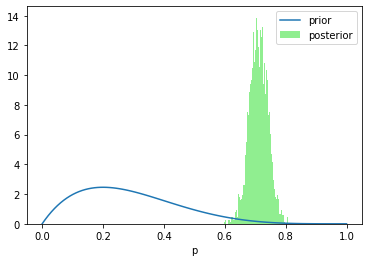

In [101]:
x = np.linspace(0, 1, 100)
posterior = samples2.stan_variable('p')
plt.plot(x, stats.beta.pdf(x, 2, 5))
plt.hist(posterior, bins=100, density=True, color='lightgreen');
plt.xlabel('p')
plt.legend(['prior', 'posterior'])
plt.show()

In [12]:
mean_p = np.mean(posterior)
ci = az.hdi(posterior, 0.89)
print(f"Posterior mean: {mean_p}")
print(f"89% confidennce interval: [{ci[0]}, {ci[1]}]")

Posterior mean: 0.7111529842500001
89% confidennce interval: [0.666129, 0.762192]


#### Considering only 7 tosses:

In [15]:
sum(coin_toss[:7])

4

In [16]:
samples3 = model1.sample(data={
    'T': 4,
    'N': 7
}, output_dir='samples')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3


#### With only 7 tosses and uniform prior, posterior distribution has wider 0.89 confidennce interval than before:

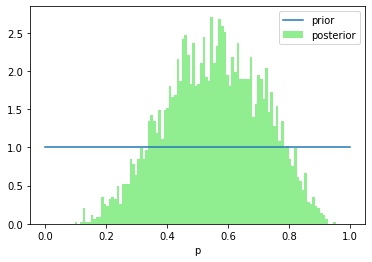

In [100]:
x = np.linspace(0, 1, 100)
posterior = samples3.stan_variable('p')
plt.plot(x, stats.uniform.pdf(x))
plt.hist(posterior, bins=100, density=True, color='lightgreen')
plt.xlabel('p')
plt.legend(['prior', 'posterior'])
plt.show()

In [18]:
mean_p = np.mean(posterior)
ci = az.hdi(posterior, 0.89)
print(f"Posterior mean: {mean_p}")
print(f"89% confidennce interval: [{ci[0]}, {ci[1]}]")

Posterior mean: 0.5533561004499999
89% confidennce interval: [0.313723, 0.818392]


In [19]:
samples4 = model2.sample(data={
    'T': 4,
    'N': 7,
    'alfa': 2,
    'beta': 5
}, output_dir='samples')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


#### In this case, non-informative prior caused posterior to be moved towards lower values of p. Mean of posterior amounts to 0.43 instead of 0.55, and 89% confidennce interval is (0.23, 0.63) instead of (0.31, 0.81). Values of p above approximately 0.8 have been almost completely cut by the prior:

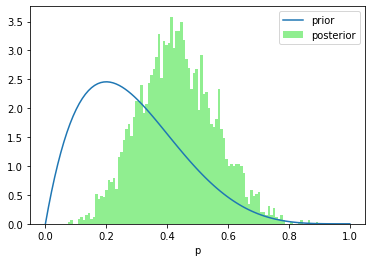

In [99]:
x = np.linspace(0, 1, 100)
posterior = samples4.stan_variable('p')
plt.plot(x, stats.beta.pdf(x, 2, 5))
plt.hist(posterior, bins=100, density=True, color='lightgreen');
plt.xlabel('p')
plt.legend(['prior', 'posterior'])
plt.show()

In [22]:
mean_p = np.mean(posterior)
ci = az.hdi(posterior, 0.89)
print(f"Posterior mean: {mean_p}")
print(f"89% confidennce interval: [{ci[0]}, {ci[1]}]")

Posterior mean: 0.43269635945000007
89% confidennce interval: [0.237553, 0.636225]


# Exercise 2 part 1
We consider the number of fatal accidents and deaths on scheduled airline flights per year over a ten-year period. Source: Gelman et al. 2014 Reproduced from Statistical Abstract of the United States.
Our goal is to create a model predicting such number in 1986.

In [5]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Using the data from the following table create a model predicting the number of passenger deaths. Use Poisson distribution assuming that the accident rate is constant for all years and not depending on anything.

In [32]:
dts=[24,734,25,516,31,754,31,877,22,814,21,362,26,764,20,809,16,223,22,1066]
c1=dts[::2]
c2=dts[1::2]

Airline_data=pd.DataFrame({'Year':[1976,1977,1978,1979,1980,1981,1982,1983,1984,1985],
'Fatal accidents':c1,  
'Passenger deaths':c2,
'Death rate':[0.19,0.12,0.15,0.16,0.14,0.06,0.13,0.13,0.03,0.15]}).set_index('Year')
Airline_data['Miles flown [100 mln miles]']=np.round(Airline_data['Passenger deaths']/Airline_data['Death rate'])

In [33]:
Airline_data

,Fatal accidents,Passenger deaths,Death rate,Miles flown [100 mln miles]
Year,,,,
1976,24,734,0.19,3863.0
1977,25,516,0.12,4300.0
1978,31,754,0.15,5027.0
1979,31,877,0.16,5481.0
1980,22,814,0.14,5814.0
1981,21,362,0.06,6033.0
1982,26,764,0.13,5877.0
1983,20,809,0.13,6223.0
1984,16,223,0.03,7433.0


Model3 assumes that number of passenger deaths is constant and has a Poisson distribution with $\lambda$ parameter. Prior for $\lambda$ has a normal distribution with mean 600 and standard deviation 257, because it was assumed that one accident with 100 fatalities can happen every 2 months (600 deaths per year).  Such accident happening every month (1200 deaths per year) is unlikely, so that 99% of prior values should be less than 1200. So the standard deviation of prior should account to 257.

#### Stan code for model3:
<code>data {
    int&lt;lower=1&gt; N;
    int passengerDeaths[N];
}
parameters {
    real&lt;lower=0&gt; lambda;
}
model {
    passengerDeaths ~ poisson(lambda);
    lambda ~ normal(600, 257);
}</code>

In [30]:
model3 = CmdStanModel(stan_file='model3.stan')

INFO:cmdstanpy:compiling stan program, exe file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model3
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model3


In [34]:
passengerDeaths = Airline_data['Passenger deaths'].to_list()
samples5 = model3.sample(data={
    'N': len(passengerDeaths),
    'passengerDeaths': passengerDeaths
    }, output_dir='sample')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1


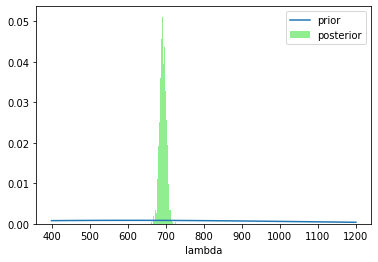

In [98]:
x = np.linspace(400,1200, 100)
y = stats.norm.pdf(x, 600, 468)
plt.plot(x, y)
lambdas = samples5.stan_variable('lambda')
plt.hist(lambdas, bins=100, density=True, color='lightgreen')
plt.xlabel('lambda')
plt.legend(['prior', 'posterior'])
plt.show()

In [37]:
mean_lambda = np.mean(lambdas)
ci = az.hdi(lambdas, 0.89)
print(f"Posterior mean: {mean_lambda}")
print(f"89% confidennce interval: [{ci[0]}, {ci[1]}]")

Posterior mean: 692.3543495
89% confidennce interval: [679.401, 705.602]


#### Posterior predictive distribution for number of deaths:

In [42]:
numDeaths = stats.poisson.rvs(lambdas, size=len(lambdas))

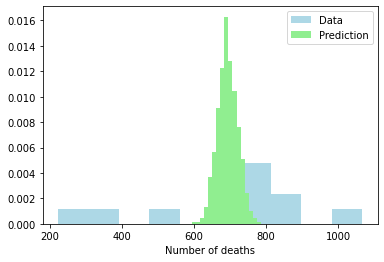

In [103]:
plt.hist(passengerDeaths, density=True, color='lightblue')
plt.hist(numDeaths, bins=20, density=True, color='lightgreen')
plt.xlabel('Number of deaths')
plt.legend(['Data', 'Prediction'])
plt.show()

In [44]:
mean_num_deaths = np.mean(numDeaths)
ci = az.hdi(numDeaths, 0.89)
print(f"Number of deaths mean: {mean_lambda}")
print(f"89% confidennce interval: [{ci[0]}, {ci[1]}]")

Number of deaths mean: 692.3543495
89% confidennce interval: [645, 734]


The model is very confident about number of deaths being around 700 people per year, while in reality this number can be very different depending on a specific year.

# Exercise 2 part 2
Using the same data as before, create a model predicting the number of passenger deaths. Use Poisson distribution assuming that the intensity is constant, but the rate is a product of intensity and miles flown.

In [46]:
miles_mean = np.mean(Airline_data['Miles flown [100 mln miles]'])
print(miles_mean)

5715.8


In [48]:
600/miles_mean

0.10497218237167151

In [75]:
257/miles_mean

0.04496308478253263

In model4, number of passenger deaths is modeled as having Poisson distribution with a parameter being a product of new parameter theta and number of miles flown in that year. The prior for theta was computed, so that the product of it and the mean of miles flown, similar distribution as before.

#### Stan code for model4:

<code>data {
    int&lt;lower=1&gt; N;
    vector[M] miles;
    int passengerDeaths[N];
}
parameters {
    real&lt;lower=0&gt; theta;
}
model {
    theta ~ normal(0.1, 0.044);
    for (i in 1:N) {
       passengerDeaths[i] ~ poisson(miles[k]*theta);
    }
}</code>

In [59]:
model4 = CmdStanModel(stan_file='model4.stan')

INFO:cmdstanpy:compiling stan program, exe file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model4
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model4


In [60]:
passengerDeaths = Airline_data['Passenger deaths'].to_list()
miles = Airline_data['Miles flown [100 mln miles]'].to_list()
samples6 = model4.sample(data={
    'N': len(passengerDeaths),
    'passengerDeaths': passengerDeaths,
    'miles': miles
    }, output_dir='sample')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3


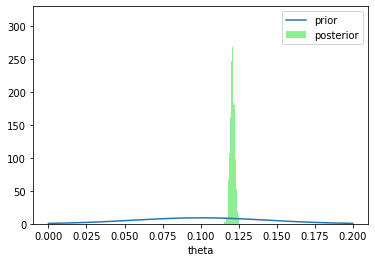

In [104]:
x = np.linspace(0,0.2, 100)
y = stats.norm.pdf(x, 0.1, 0.044)
plt.plot(x, y)
thetas = samples6.stan_variable('theta')
plt.hist(thetas, bins=100, density=True, color='lightgreen')
plt.xlabel('theta')
plt.legend(['prior', 'posterior'])
plt.show()

In [84]:
mean_thetas = np.mean(thetas)
ci = az.hdi(thetas, 0.89)
print(f"Number of deaths mean: {mean_thetas}")
print(f"89% confidennce interval: [{ci[0]}, {ci[1]}]")

Number of deaths mean: 0.12100862975000001
89% confidennce interval: [0.118657, 0.123207]


#### Posterior predictive distribution: 

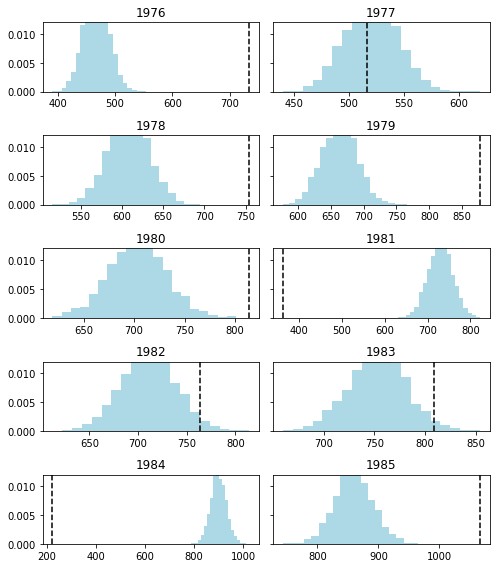

In [95]:
fig, axes = plt.subplots(5, 2, figsize=(7, 8), sharey=True)
axes_flat=axes.flatten()
for k in range(len(axes_flat)):
    ax = axes_flat[k]
    simulated_deaths = stats.poisson.rvs(thetas*miles[k], size=len(thetas))
    ax.hist(simulated_deaths,bins=20, density=True, color='lightblue')
    ax.set_title(Airline_data.index[k])
    true_value = passengerDeaths[k]
    ax.plot([true_value,true_value],[0,0.02],linestyle='--',color='black')
    ax.set_ylim([0,0.012])

fig.tight_layout()

plt.show()

For some years model correctly predicts number of deaths of passangers, but for most of the years, prediction is wrong. There are other factors that influence the number of deaths in air crashes, that have not been taken into account while creating the model.  